In [3]:
import pandas as pd

# Cargar visitas
visits = pd.read_csv('/datasets/visits_log_us.csv')

# Cargar pedidos
orders = pd.read_csv('/datasets/orders_log_us.csv')

# Cargar costos de marketing
costs = pd.read_csv('/datasets/costs_us.csv')


In [4]:

# Convertir columnas de fechas a tipo datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Renombrar columnas a snake_case para consistencia
visits.rename(columns={
    'Start Ts': 'start_ts',
    'End Ts': 'end_ts',
    'Source Id': 'source_id',
    'Uid': 'uid'
}, inplace=True)

orders.rename(columns={
    'Buy Ts': 'buy_ts',
    'Revenue': 'revenue',
    'Uid': 'uid'
}, inplace=True)

costs.rename(columns={
    'source_id': 'source_id',
    'dt': 'dt',
    'costs': 'costs'
}, inplace=True)

# Verificar los resultados
print(visits.info())
print(orders.info())
print(costs.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entri

In [5]:
# Crear una copia para análisis
visits_daily = visits.copy()

# Agregar columnas de fecha para agrupaciones
visits_daily['date'] = visits_daily['start_ts'].dt.date
visits_daily['week'] = visits_daily['start_ts'].dt.to_period('W').apply(lambda r: r.start_time)
visits_daily['month'] = visits_daily['start_ts'].dt.to_period('M').dt.to_timestamp()

# Calcular usuarios únicos por cada período
daily_users = visits_daily.groupby('date')['uid'].nunique().reset_index(name='daily_unique_users')
weekly_users = visits_daily.groupby('week')['uid'].nunique().reset_index(name='weekly_unique_users')
monthly_users = visits_daily.groupby('month')['uid'].nunique().reset_index(name='monthly_unique_users')

# Mostrar resultados
print(daily_users.head())
print(weekly_users.head())
print(monthly_users.head())



         date  daily_unique_users
0  2017-06-01                 605
1  2017-06-02                 608
2  2017-06-03                 445
3  2017-06-04                 476
4  2017-06-05                 820
        week  weekly_unique_users
0 2017-05-29                 2021
1 2017-06-05                 4129
2 2017-06-12                 2812
3 2017-06-19                 2878
4 2017-06-26                 3064
       month  monthly_unique_users
0 2017-06-01                 13259
1 2017-07-01                 14183
2 2017-08-01                 11631
3 2017-09-01                 18975
4 2017-10-01                 29692


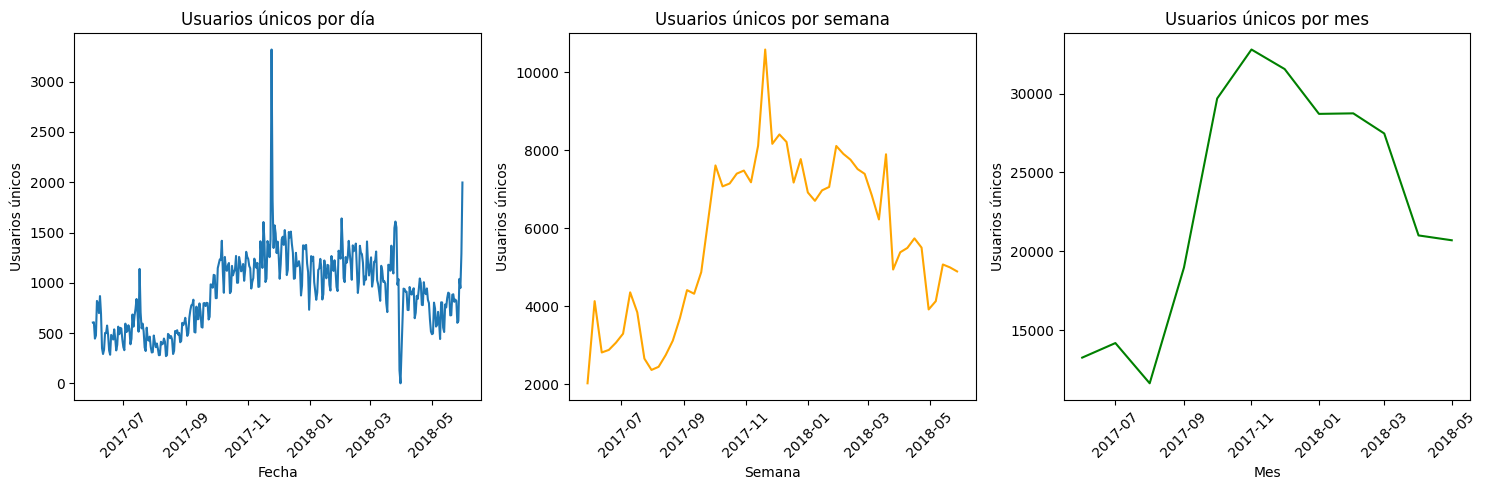

In [6]:
import matplotlib.pyplot as plt

# Configurar el tamaño y estilo general
plt.figure(figsize=(15, 5))

# Gráfico de usuarios únicos diarios
plt.subplot(1, 3, 1)
plt.plot(daily_users['date'], daily_users['daily_unique_users'])
plt.title('Usuarios únicos por día')
plt.xlabel('Fecha')
plt.ylabel('Usuarios únicos')
plt.xticks(rotation=45)

# Gráfico de usuarios únicos semanales
plt.subplot(1, 3, 2)
plt.plot(weekly_users['week'], weekly_users['weekly_unique_users'], color='orange')
plt.title('Usuarios únicos por semana')
plt.xlabel('Semana')
plt.ylabel('Usuarios únicos')
plt.xticks(rotation=45)

# Gráfico de usuarios únicos mensuales
plt.subplot(1, 3, 3)
plt.plot(monthly_users['month'], monthly_users['monthly_unique_users'], color='green')
plt.title('Usuarios únicos por mes')
plt.xlabel('Mes')
plt.ylabel('Usuarios únicos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [7]:
# Extraer la fecha de cada sesión desde la columna de inicio
visits['date'] = visits['start_ts'].dt.date

# Contar cuántas sesiones hubo por día
daily_sessions = visits.groupby('date').size().reset_index(name='sessions_per_day')

# Mostrar las primeras filas
print(daily_sessions.head())


         date  sessions_per_day
0  2017-06-01               664
1  2017-06-02               658
2  2017-06-03               477
3  2017-06-04               510
4  2017-06-05               893


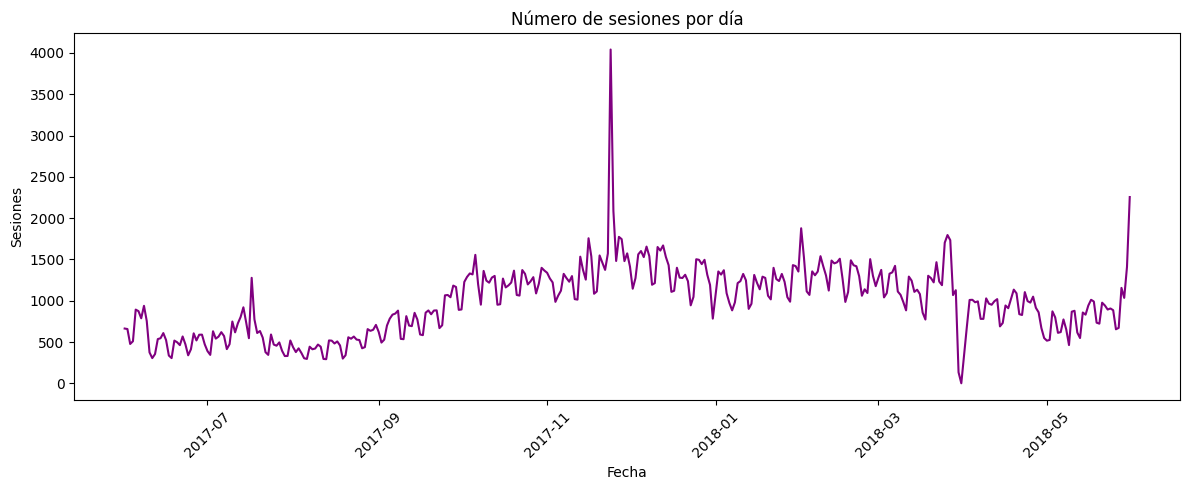

In [8]:
# Extraer la fecha desde la columna 'start_ts'
visits['date'] = visits['start_ts'].dt.date

# Contar sesiones por día
daily_sessions = visits.groupby('date').size().reset_index(name='sessions_per_day')

# Graficar sesiones por día
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_sessions['date'], daily_sessions['sessions_per_day'], color='purple')
plt.title('Número de sesiones por día')
plt.xlabel('Fecha')
plt.ylabel('Sesiones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
# Calcular duración de cada sesión
visits['session_duration'] = visits['end_ts'] - visits['start_ts']

# Verificar las primeras duraciones
print(visits[['uid', 'start_ts', 'end_ts', 'session_duration']].head())


                    uid            start_ts              end_ts  \
0  16879256277535980062 2017-12-20 17:20:00 2017-12-20 17:38:00   
1    104060357244891740 2018-02-19 16:53:00 2018-02-19 17:21:00   
2   7459035603376831527 2017-07-01 01:54:00 2017-07-01 01:54:00   
3  16174680259334210214 2018-05-20 10:59:00 2018-05-20 11:23:00   
4   9969694820036681168 2017-12-27 14:06:00 2017-12-27 14:06:00   

  session_duration  
0  0 days 00:18:00  
1  0 days 00:28:00  
2  0 days 00:00:00  
3  0 days 00:24:00  
4  0 days 00:00:00  


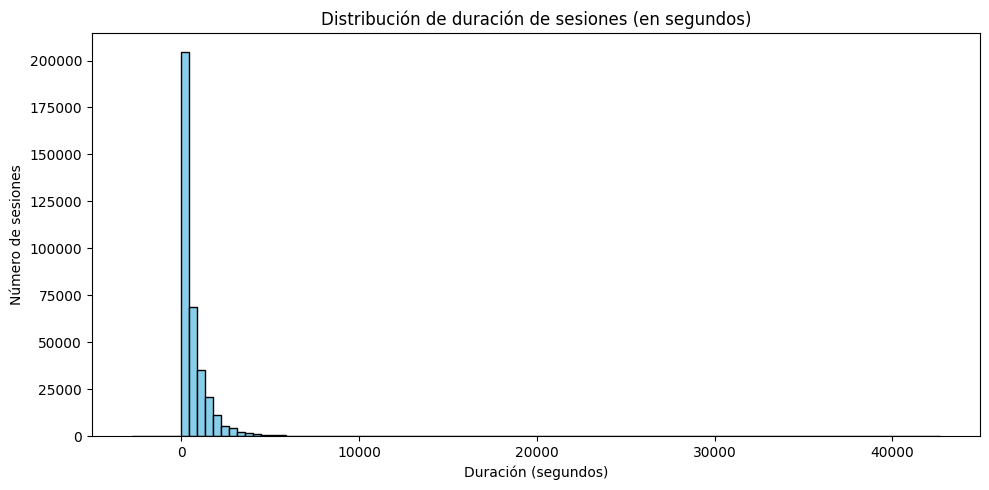

In [9]:
# Calcular duración de cada sesión
visits['session_duration'] = visits['end_ts'] - visits['start_ts']

# Convertir duración a segundos para graficar
visits['duration_seconds'] = visits['session_duration'].dt.total_seconds()

# Graficar la distribución de duración de sesiones
plt.figure(figsize=(10, 5))
plt.hist(visits['duration_seconds'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribución de duración de sesiones (en segundos)')
plt.xlabel('Duración (segundos)')
plt.ylabel('Número de sesiones')
plt.tight_layout()
plt.show()


In [10]:
# Ordenar por usuario y fecha de inicio de sesión
visits_sorted = visits.sort_values(by=['uid', 'start_ts'])

# Calcular la diferencia entre sesiones consecutivas del mismo usuario
visits_sorted['prev_session'] = visits_sorted.groupby('uid')['start_ts'].shift()
visits_sorted['return_time'] = visits_sorted['start_ts'] - visits_sorted['prev_session']

# Mostrar las primeras filas con el tiempo de retorno
print(visits_sorted[['uid', 'start_ts', 'prev_session', 'return_time']].head(10))


                    uid            start_ts        prev_session  \
196543   11863502262781 2018-03-01 17:27:00                 NaT   
257333   49537067089222 2018-02-06 15:55:00                 NaT   
173818  297729379853735 2017-06-07 18:47:00                 NaT   
173142  313578113262317 2017-09-18 22:49:00                 NaT   
192554  313578113262317 2018-02-18 15:17:00 2017-09-18 22:49:00   
113873  313578113262317 2018-03-11 17:23:00 2018-02-18 15:17:00   
34588   325320750514679 2017-09-30 14:29:00                 NaT   
41778   325320750514679 2018-02-26 12:33:00 2017-09-30 14:29:00   
188450  397399764396656 2018-01-18 12:32:00                 NaT   
183750  407573351275847 2017-06-17 13:40:00                 NaT   

             return_time  
196543               NaT  
257333               NaT  
173818               NaT  
173142               NaT  
192554 152 days 16:28:00  
113873  21 days 02:06:00  
34588                NaT  
41778  148 days 22:04:00  
188450             

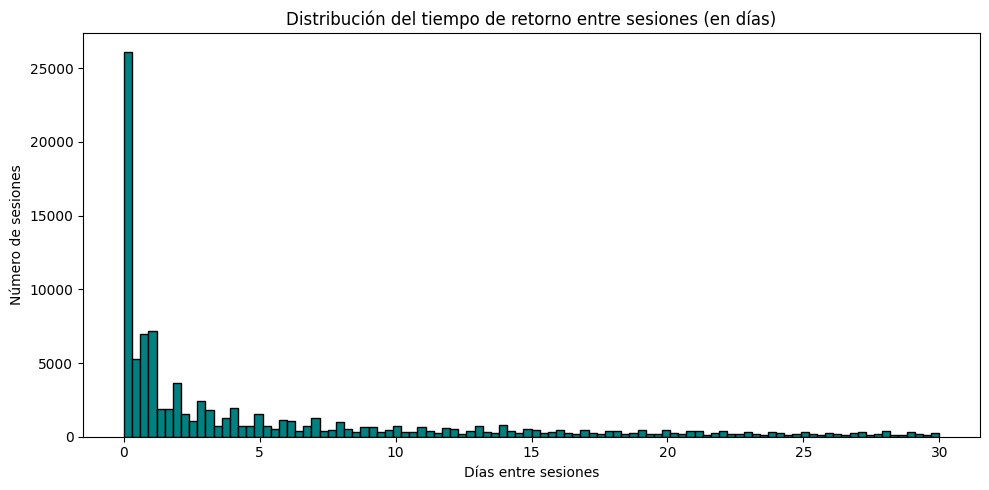

In [11]:
# Ordenar por usuario y fecha de inicio de sesión
visits_sorted = visits.sort_values(by=['uid', 'start_ts'])

# Calcular la diferencia entre sesiones consecutivas del mismo usuario
visits_sorted['prev_session'] = visits_sorted.groupby('uid')['start_ts'].shift()
visits_sorted['return_time'] = visits_sorted['start_ts'] - visits_sorted['prev_session']

# Convertir el tiempo de retorno a días
visits_sorted['return_days'] = visits_sorted['return_time'].dt.total_seconds() / (60 * 60 * 24)

# Eliminar valores nulos
return_days_clean = visits_sorted['return_days'].dropna()

# Graficar distribución
plt.figure(figsize=(10, 5))
plt.hist(return_days_clean, bins=100, color='teal', edgecolor='black', range=(0, 30))
plt.title('Distribución del tiempo de retorno entre sesiones (en días)')
plt.xlabel('Días entre sesiones')
plt.ylabel('Número de sesiones')
plt.tight_layout()
plt.show()


In [12]:
# 1. Obtener la primera visita (registro) de cada usuario
first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit']

# 2. Obtener la primera compra de cada usuario
first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_order']

# 3. Unir visitas y compras por uid
user_lifecycle = pd.merge(first_visits, first_orders, on='uid', how='inner')

# 4. Calcular días hasta la conversión
user_lifecycle['conversion_days'] = (user_lifecycle['first_order'] - user_lifecycle['first_visit']).dt.days

# 5. Contar cuántos usuarios convirtieron en 0d, 1d, 2d, etc.
conversion_distribution = user_lifecycle['conversion_days'].value_counts().sort_index().reset_index()
conversion_distribution.columns = ['days_to_conversion', 'user_count']

# Mostrar tabla
print(conversion_distribution.head(10))


   days_to_conversion  user_count
0                   0       26363
1                   1        1011
2                   2         563
3                   3         434
4                   4         324
5                   5         270
6                   6         260
7                   7         218
8                   8         189
9                   9         140


In [13]:
# Asegurar que la columna buy_ts sea datetime (por si acaso)
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

# Extraer la fecha
orders['order_date'] = orders['buy_ts'].dt.date

# Contar cuántos pedidos hubo por día
daily_orders = orders.groupby('order_date').size().reset_index(name='orders_per_day')

# Mostrar las primeras filas
print(daily_orders.head())

# Por semana
orders['order_week'] = orders['buy_ts'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_orders = orders.groupby('order_week').size().reset_index(name='orders_per_week')

print(weekly_orders.head())

# Por mes
orders['order_month'] = orders['buy_ts'].dt.to_period('M').dt.to_timestamp()
monthly_orders = orders.groupby('order_month').size().reset_index(name='orders_per_month')

print (monthly_orders. head())


   order_date  orders_per_day
0  2017-06-01              96
1  2017-06-02             111
2  2017-06-03              67
3  2017-06-04              66
4  2017-06-05             161
  order_week  orders_per_week
0 2017-05-29              340
1 2017-06-05              938
2 2017-06-12              343
3 2017-06-19              371
4 2017-06-26              460
  order_month  orders_per_month
0  2017-06-01              2354
1  2017-07-01              2363
2  2017-08-01              1807
3  2017-09-01              3387
4  2017-10-01              5679


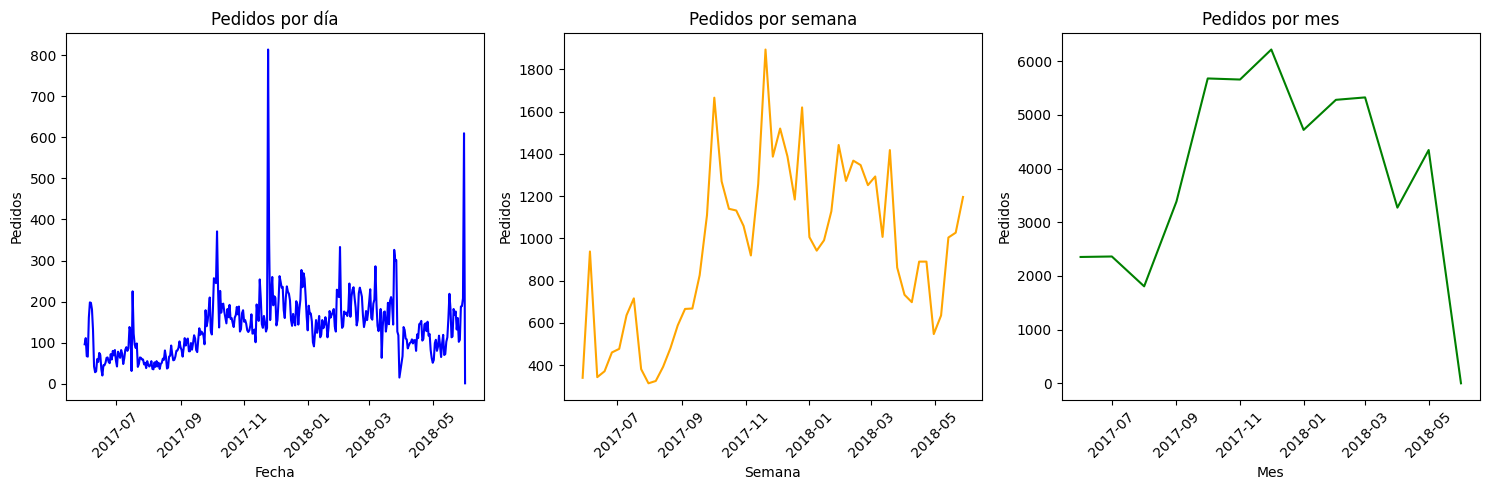

In [14]:
# Extraer fechas para agrupación por día, semana y mes
orders['order_date'] = orders['buy_ts'].dt.date
orders['order_week'] = orders['buy_ts'].dt.to_period('W').apply(lambda r: r.start_time)
orders['order_month'] = orders['buy_ts'].dt.to_period('M').dt.to_timestamp()

# Agrupar por día, semana y mes
daily_orders = orders.groupby('order_date').size().reset_index(name='orders_per_day')
weekly_orders = orders.groupby('order_week').size().reset_index(name='orders_per_week')
monthly_orders = orders.groupby('order_month').size().reset_index(name='orders_per_month')

# Graficar
plt.figure(figsize=(15, 5))

# Pedidos por día
plt.subplot(1, 3, 1)
plt.plot(daily_orders['order_date'], daily_orders['orders_per_day'], color='blue')
plt.title('Pedidos por día')
plt.xlabel('Fecha')
plt.ylabel('Pedidos')
plt.xticks(rotation=45)

# Pedidos por semana
plt.subplot(1, 3, 2)
plt.plot(weekly_orders['order_week'], weekly_orders['orders_per_week'], color='orange')
plt.title('Pedidos por semana')
plt.xlabel('Semana')
plt.ylabel('Pedidos')
plt.xticks(rotation=45)

# Pedidos por mes
plt.subplot(1, 3, 3)
plt.plot(monthly_orders['order_month'], monthly_orders['orders_per_month'], color='green')
plt.title('Pedidos por mes')
plt.xlabel('Mes')
plt.ylabel('Pedidos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [15]:
# Calcular el tamaño promedio de compra (valor promedio por pedido)
average_order_value = orders['revenue'].mean()

# Mostrar resultado
print(f"Tamaño promedio de compra: ${average_order_value:.2f}")


Tamaño promedio de compra: $5.00


In [16]:
# Asegurarse de que buy_ts esté en formato datetime
orders['order_month'] = orders['buy_ts'].dt.to_period('M').dt.to_timestamp()

# Calcular tamaño promedio de compra por mes
aov_by_month = orders.groupby('order_month')['revenue'].mean().reset_index(name='avg_order_value')

# Mostrar resultados
print(aov_by_month.head())


  order_month  avg_order_value
0  2017-06-01         4.060106
1  2017-07-01         5.306589
2  2017-08-01         4.847139
3  2017-09-01         5.416448
4  2017-10-01         4.928280


In [17]:
# Unir con visitas para obtener el source_id por usuario
orders_with_source = orders.merge(visits[['uid', 'source_id']], on='uid', how='left')

# Calcular tamaño promedio de compra por fuente de tráfico
aov_by_source = orders_with_source.groupby('source_id')['revenue'].mean().reset_index(name='avg_order_value')

# Mostrar resultados
print(aov_by_source)


   source_id  avg_order_value
0          1         9.242265
1          2        11.071013
2          3         6.344095
3          4         7.923842
4          5         7.781887
5          7         1.220000
6          9         3.806667
7         10         3.630303


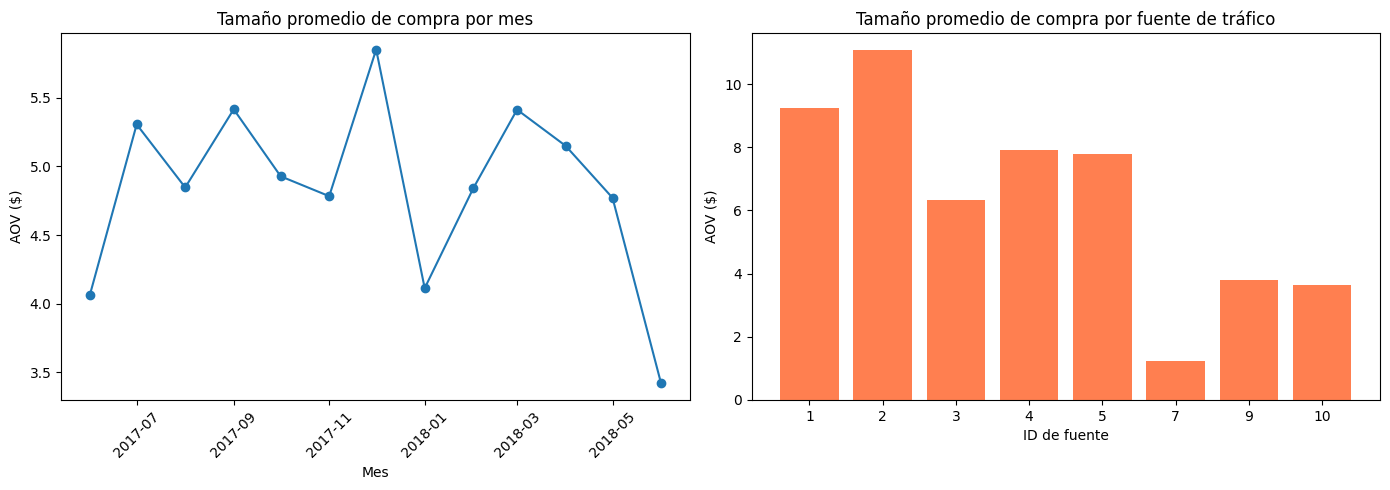

In [18]:

# Promedio general
average_order_value = orders['revenue'].mean()

# AOV por mes
aov_by_month = orders.groupby('order_month')['revenue'].mean().reset_index(name='avg_order_value')

# Unir orders con visits para obtener source_id
orders_with_source = orders.merge(visits[['uid', 'source_id']], on='uid', how='left')

# AOV por fuente de tráfico
aov_by_source = orders_with_source.groupby('source_id')['revenue'].mean().reset_index(name='avg_order_value')

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# AOV por mes
plt.subplot(1, 2, 1)
plt.plot(aov_by_month['order_month'], aov_by_month['avg_order_value'], marker='o')
plt.title('Tamaño promedio de compra por mes')
plt.xlabel('Mes')
plt.ylabel('AOV ($)')
plt.xticks(rotation=45)

# AOV por fuente de tráfico
plt.subplot(1, 2, 2)
plt.bar(aov_by_source['source_id'].astype(str), aov_by_source['avg_order_value'], color='coral')
plt.title('Tamaño promedio de compra por fuente de tráfico')
plt.xlabel('ID de fuente')
plt.ylabel('AOV ($)')

plt.tight_layout()  # ← esta es la línea corregida
plt.show()


In [19]:
# 1. Calcular ingresos totales por usuario
user_revenue = orders.groupby('uid')['revenue'].sum().reset_index()
user_revenue.columns = ['uid', 'ltv']

# 2. Calcular LTV promedio general
ltv_mean = user_revenue['ltv'].mean()
print(f"LTV promedio general: ${ltv_mean:.2f}")

# 3. Unir con source_id desde visits
user_sources = visits[['uid', 'source_id']].drop_duplicates()
ltv_with_source = user_revenue.merge(user_sources, on='uid', how='left')

# 4. Calcular LTV promedio por fuente de tráfico
ltv_by_source = ltv_with_source.groupby('source_id')['ltv'].mean().reset_index(name='avg_ltv')

# Mostrar resultados
print(ltv_by_source)


LTV promedio general: $6.90
   source_id    avg_ltv
0          1  14.238075
1          2  15.540658
2          3   8.608514
3          4   8.412227
4          5  10.981947
5          7   1.220000
6          9   6.734579
7         10   4.635488


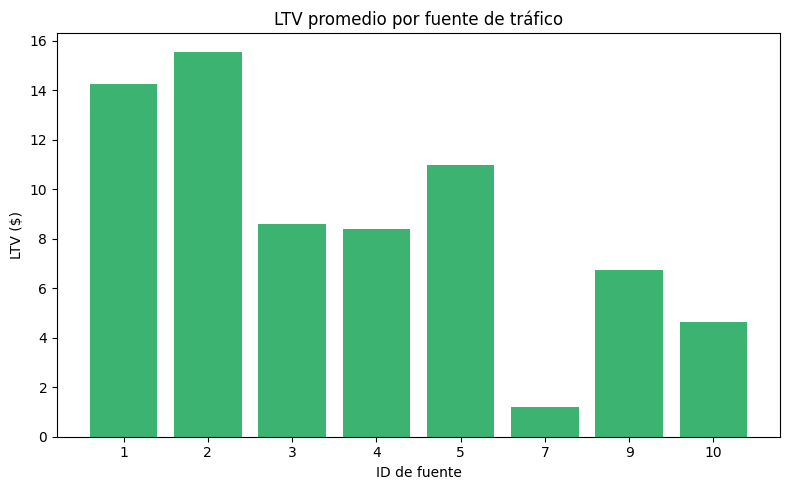

In [20]:
# 1. Calcular ingresos totales por usuario
user_revenue = orders.groupby('uid')['revenue'].sum().reset_index()
user_revenue.columns = ['uid', 'ltv']

# 2. Calcular LTV promedio general
ltv_mean = user_revenue['ltv'].mean()

# 3. Unir con visitas para obtener source_id
user_sources = visits[['uid', 'source_id']].drop_duplicates()
ltv_with_source = user_revenue.merge(user_sources, on='uid', how='left')

# 4. Calcular LTV promedio por fuente de tráfico
ltv_by_source = ltv_with_source.groupby('source_id')['ltv'].mean().reset_index(name='avg_ltv')

# 5. Graficar LTV por fuente de tráfico
plt.figure(figsize=(8, 5))
plt.bar(ltv_by_source['source_id'].astype(str), ltv_by_source['avg_ltv'], color='mediumseagreen')
plt.title('LTV promedio por fuente de tráfico')
plt.xlabel('ID de fuente')
plt.ylabel('LTV ($)')
plt.tight_layout()
plt.show()


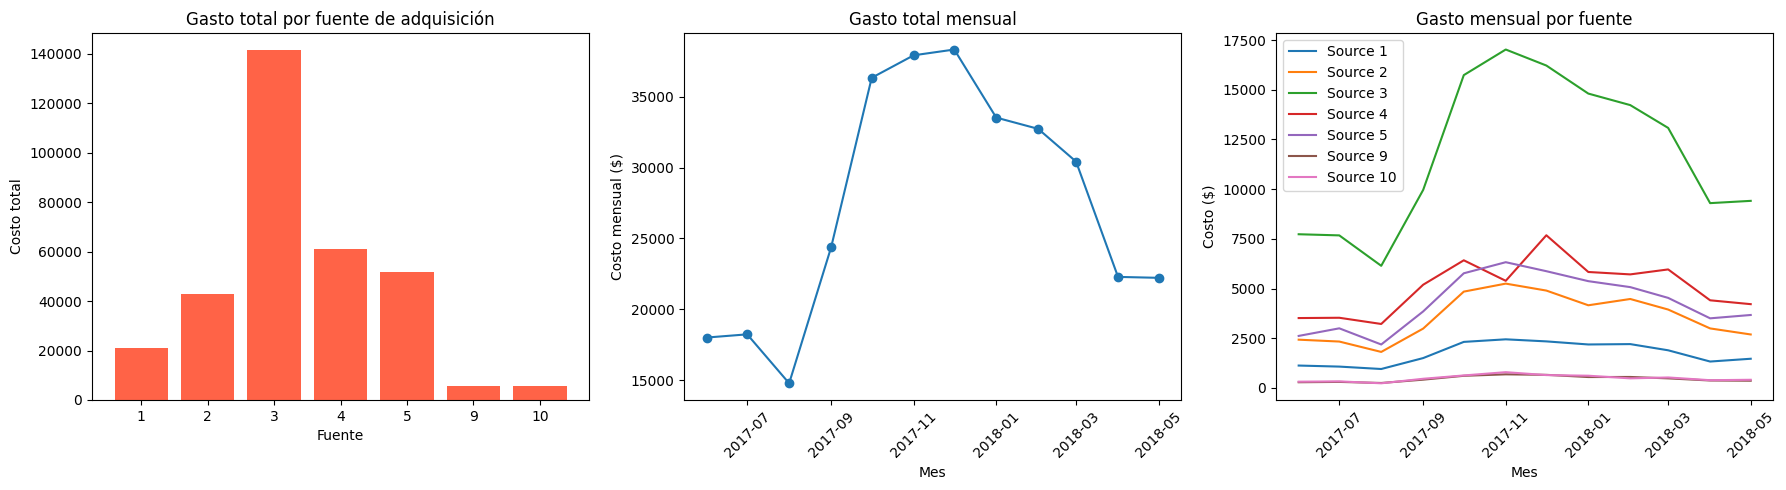

In [21]:
# Asegurarse de que la columna 'dt' esté en formato datetime
costs['dt'] = pd.to_datetime(costs['dt'])

# 1. Total gastado
total_cost = costs['costs'].sum()

# 2. Gasto por fuente de adquisición (source_id)
cost_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

# 3. Gasto por mes
costs['month'] = costs['dt'].dt.to_period('M').dt.to_timestamp()
cost_by_month = costs.groupby('month')['costs'].sum().reset_index()

# 4. Gasto por fuente y mes
cost_by_source_month = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()

# Gráficos
plt.figure(figsize=(18, 5))

# Gasto por fuente total
plt.subplot(1, 3, 1)
plt.bar(cost_by_source['source_id'].astype(str), cost_by_source['costs'], color='tomato')
plt.title('Gasto total por fuente de adquisición')
plt.xlabel('Fuente')
plt.ylabel('Costo total')

# Gasto total por mes
plt.subplot(1, 3, 2)
plt.plot(cost_by_month['month'], cost_by_month['costs'], marker='o')
plt.title('Gasto total mensual')
plt.xlabel('Mes')
plt.ylabel('Costo mensual ($)')
plt.xticks(rotation=45)

# Gasto por fuente a lo largo del tiempo
plt.subplot(1, 3, 3)
for source in cost_by_source_month['source_id'].unique():
    subset = cost_by_source_month[cost_by_source_month['source_id'] == source]
    plt.plot(subset['month'], subset['costs'], label=f'Source {source}')
plt.title('Gasto mensual por fuente')
plt.xlabel('Mes')
plt.ylabel('Costo ($)')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


📊 Gasto total por fuente de adquisición (source_id): muestra qué canales absorbieron más presupuesto.

📈 Gasto total mensual: muestra la evolución del gasto mes a mes.

📉 Gasto mensual por fuente de adquisición: compara cómo cambia el gasto a lo largo del tiempo para cada canal.

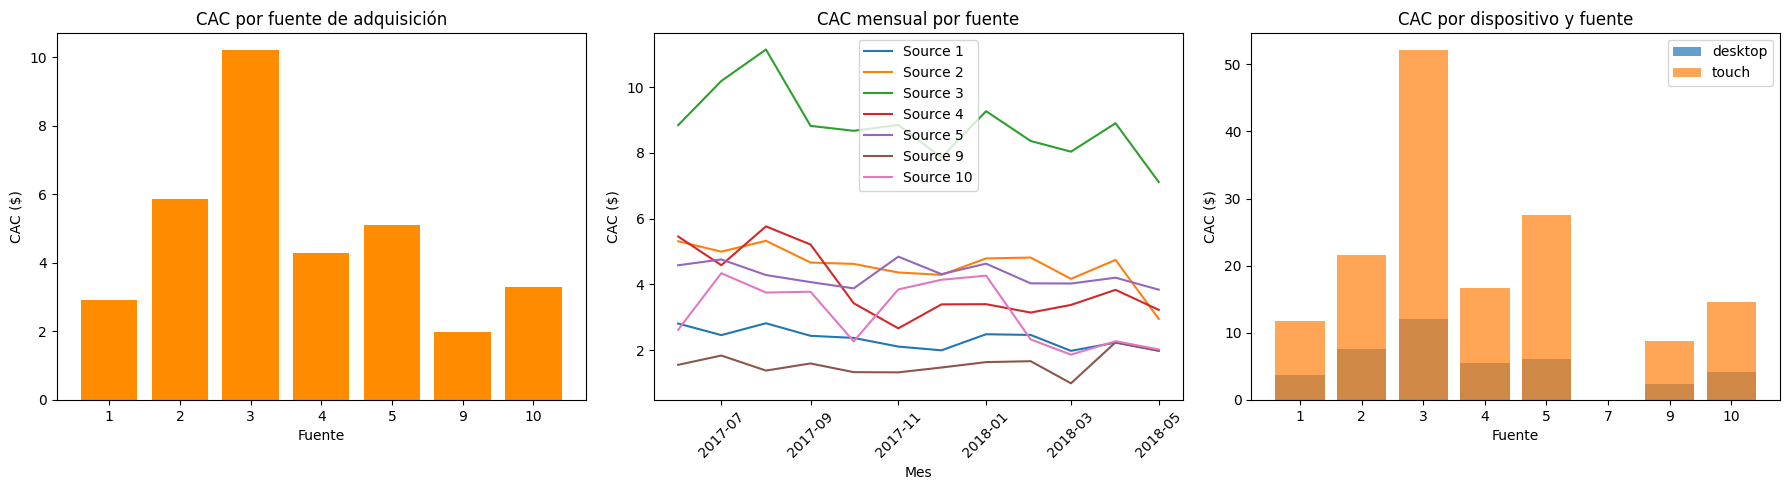

In [22]:
# 1. Usuarios únicos que compraron
buyers = orders[['uid']].drop_duplicates()

# 2. Unir con source_id y device
buyers_sources = buyers.merge(visits[['uid', 'source_id', 'Device']], on='uid', how='left').drop_duplicates()

# 3. CAC por fuente
customers_by_source = buyers_sources.groupby('source_id')['uid'].nunique().reset_index(name='customers')
cost_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
cac_by_source = pd.merge(cost_by_source, customers_by_source, on='source_id', how='inner')
cac_by_source['cac'] = cac_by_source['costs'] / cac_by_source['customers']

# 4. CAC por fuente y mes
buyers_with_month = orders[['uid', 'buy_ts']].copy()
buyers_with_month['month'] = buyers_with_month['buy_ts'].dt.to_period('M').dt.to_timestamp()
buyers_month_source = buyers_with_month.merge(visits[['uid', 'source_id']], on='uid', how='left').drop_duplicates()
customers_by_source_month = buyers_month_source.groupby(['month', 'source_id'])['uid'].nunique().reset_index(name='customers')
costs['month'] = costs['dt'].dt.to_period('M').dt.to_timestamp()
cost_by_source_month = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()
cac_by_source_month = pd.merge(cost_by_source_month, customers_by_source_month, on=['month', 'source_id'], how='inner')
cac_by_source_month['cac'] = cac_by_source_month['costs'] / cac_by_source_month['customers']

# 5. CAC por dispositivo y fuente
cac_by_device = buyers_sources.groupby(['Device', 'source_id'])['uid'].nunique().reset_index(name='customers')
costs_total = costs.groupby('source_id')['costs'].sum().reset_index()
cac_by_device = cac_by_device.merge(costs_total, on='source_id', how='left')
cac_by_device['cac'] = cac_by_device['costs'] / cac_by_device['customers']

# Gráficos
plt.figure(figsize=(18, 5))

# CAC por fuente
plt.subplot(1, 3, 1)
plt.bar(cac_by_source['source_id'].astype(str), cac_by_source['cac'], color='darkorange')
plt.title('CAC por fuente de adquisición')
plt.xlabel('Fuente')
plt.ylabel('CAC ($)')

# CAC por fuente a lo largo del tiempo
plt.subplot(1, 3, 2)
for source in cac_by_source_month['source_id'].unique():
    subset = cac_by_source_month[cac_by_source_month['source_id'] == source]
    plt.plot(subset['month'], subset['cac'], label=f'Source {source}')
plt.title('CAC mensual por fuente')
plt.xlabel('Mes')
plt.ylabel('CAC ($)')
plt.xticks(rotation=45)
plt.legend()

# CAC por dispositivo y fuente
plt.subplot(1, 3, 3)
for device in cac_by_device['Device'].unique():
    subset = cac_by_device[cac_by_device['Device'] == device]
    plt.bar(subset['source_id'].astype(str), subset['cac'], label=device, alpha=0.7)
plt.title('CAC por dispositivo y fuente')
plt.xlabel('Fuente')
plt.ylabel('CAC ($)')
plt.legend()

plt.tight_layout()
plt.show()


📊 Fuente de adquisición: cuánto costó adquirir un cliente por canal.

📈 Mes y fuente: evolución del CAC a lo largo del tiempo por canal.

📱 Dispositivo y fuente: diferencia en CAC según si el cliente llegó desde móvil, desktop, etc.

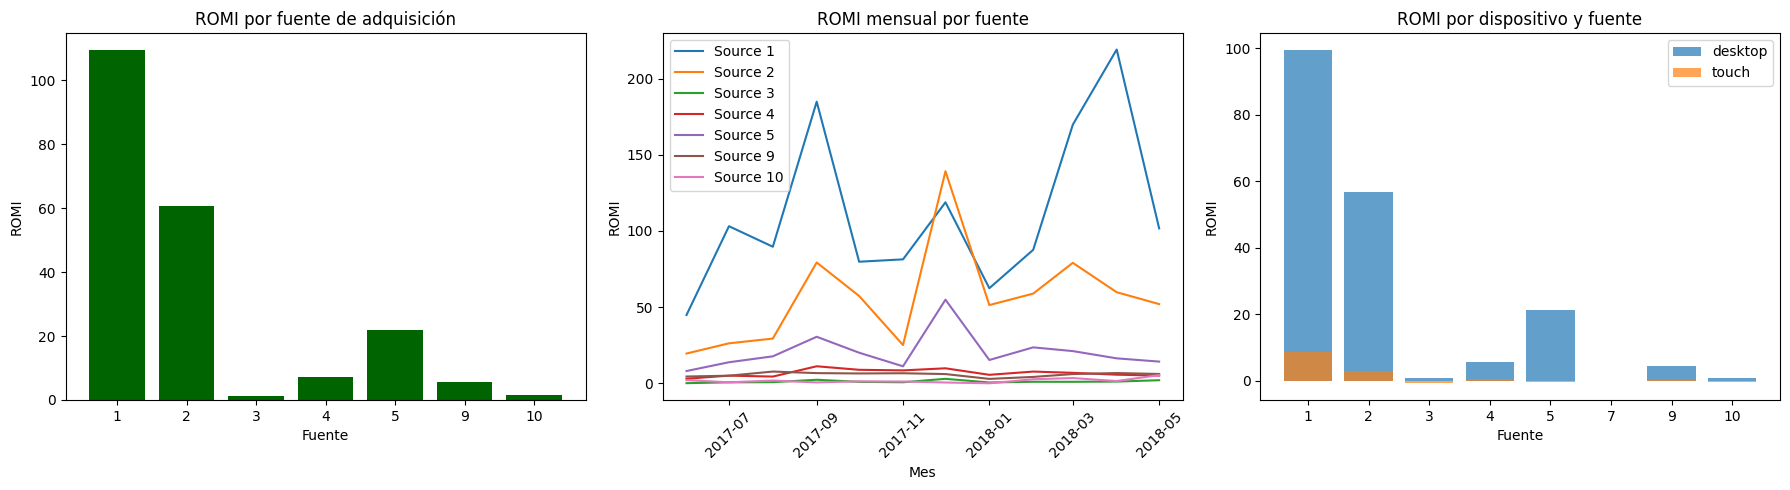

In [23]:
# ROMI = (Ingresos - Costos de marketing) / Costos de marketing

# 1. Ingresos por fuente de adquisición
orders_with_source = orders.merge(visits[['uid', 'source_id', 'Device']], on='uid', how='left')
revenue_by_source = orders_with_source.groupby('source_id')['revenue'].sum().reset_index(name='revenue')

# 2. ROMI por fuente
romi_by_source = pd.merge(revenue_by_source, cost_by_source, on='source_id', how='inner')
romi_by_source['romi'] = (romi_by_source['revenue'] - romi_by_source['costs']) / romi_by_source['costs']

# 3. ROMI por mes y fuente
orders_with_source['month'] = orders_with_source['buy_ts'].dt.to_period('M').dt.to_timestamp()
revenue_by_source_month = orders_with_source.groupby(['month', 'source_id'])['revenue'].sum().reset_index(name='revenue')
romi_by_source_month = pd.merge(revenue_by_source_month, cost_by_source_month, on=['month', 'source_id'], how='inner')
romi_by_source_month['romi'] = (romi_by_source_month['revenue'] - romi_by_source_month['costs']) / romi_by_source_month['costs']

# 4. ROMI por dispositivo y fuente
revenue_by_device = orders_with_source.groupby(['Device', 'source_id'])['revenue'].sum().reset_index()
romi_by_device = pd.merge(revenue_by_device, costs_total, on='source_id', how='left')
romi_by_device['romi'] = (romi_by_device['revenue'] - romi_by_device['costs']) / romi_by_device['costs']

# Gráficos
plt.figure(figsize=(18, 5))

# ROMI por fuente
plt.subplot(1, 3, 1)
plt.bar(romi_by_source['source_id'].astype(str), romi_by_source['romi'], color='darkgreen')
plt.title('ROMI por fuente de adquisición')
plt.xlabel('Fuente')
plt.ylabel('ROMI')

# ROMI mensual por fuente
plt.subplot(1, 3, 2)
for source in romi_by_source_month['source_id'].unique():
    subset = romi_by_source_month[romi_by_source_month['source_id'] == source]
    plt.plot(subset['month'], subset['romi'], label=f'Source {source}')
plt.title('ROMI mensual por fuente')
plt.xlabel('Mes')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.legend()

# ROMI por dispositivo y fuente
plt.subplot(1, 3, 3)
for device in romi_by_device['Device'].unique():
    subset = romi_by_device[romi_by_device['Device'] == device]
    plt.bar(subset['source_id'].astype(str), subset['romi'], label=device, alpha=0.7)
plt.title('ROMI por dispositivo y fuente')
plt.xlabel('Fuente')
plt.ylabel('ROMI')
plt.legend()

plt.tight_layout()
plt.show()


💸 ROMI por fuente de adquisición – muestra qué canales generan más retorno por cada peso gastado.

📆 ROMI mensual por fuente – te permite ver cómo varió la rentabilidad mes a mes para cada canal.

📱 ROMI por dispositivo y fuente – compara la rentabilidad por tipo de dispositivo (mobile, desktop, etc.) y canal.


📊 Conclusiones y Recomendaciones de Inversión en Marketing

Resumen Ejecutivo
Tras analizar los datos de visitas, pedidos y gastos de marketing de Showz entre enero de 2017 y diciembre de 2018, se evaluaron las fuentes de adquisición, su efectividad y rentabilidad. Se calcularon y graficaron métricas clave como:

Número de usuarios únicos y sesiones

Tiempo hasta la conversión

Ingresos (LTV)

Costos de adquisición (CAC)

Rentabilidad (ROMI)

Comparaciones por fuente, dispositivo y temporalidad

💡 Recomendaciones de Inversión

✅ Invertir más en fuentes con alto ROMI y bajo CAC

Las fuentes con mayor retorno sobre la inversión (ROMI) y costos de adquisición sostenibles son las que más conviene escalar:

Fuente	LTV Promedio	CAC Promedio	ROMI	Recomendación
1	$14.24	$2.92	109.31	📈 Escalar
2	$15.54	$5.86	60.63	📈 Escalar
4	$8.41	$4.28	7.13	📈 Escalar
5	$10.98	$5.10	21.83	📈 Escalar

Estas fuentes no solo traen usuarios rentables, sino que también lo hacen a un costo relativamente bajo. Recomendamos aumentar la inversión en estas plataformas.

❌ Reducir inversión en canales con bajo retorno
Fuente	LTV Promedio	CAC Promedio	ROMI	Recomendación
3	$8.61	$10.21	1.10	❌ Reducir

Aunque esta fuente apenas supera el punto de equilibrio, el CAC supera al LTV, por lo que no es rentable sostenerla a largo plazo sin optimización.

📱 Optimizar campañas por dispositivo
Se observaron diferencias en ROMI y CAC por tipo de dispositivo. Recomendamos segmentar campañas para priorizar formatos que conviertan con mejor rendimiento (por ejemplo, mobile vs desktop), según la fuente.

📌 Métricas Clave Utilizadas
LTV (Lifetime Value): cuánto ingresa cada cliente a lo largo del tiempo.

CAC (Customer Acquisition Cost): cuánto costó adquirirlo.

ROMI (Return on Marketing Investment): qué tan rentable fue la inversión.

Estas métricas permiten tomar decisiones basadas en:

Rentabilidad real

Eficiencia de adquisición

Priorización de canales

✅ Conclusiones Finales


1. Escalar la inversión en las fuentes 1, 2, 4 y 5.

2 .Optimizar o pausar campañas provenientes de la fuente 3.

3 .Seguir midiendo ROMI, CAC y LTV mensualmente.

4 .Ajustar las campañas por dispositivo y canal según su desempeño.

Estas acciones ayudarán a maximizar el retorno y enfocar el presupuesto en lo que realmente genera valor
